In [ ]:
from google.colab import drive
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
# Mount your Google Drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/New Experimentation Code/merge_master.csv")
df.head()

In [ ]:
df.shape

In [ ]:
# df = df.drop("BOD - 5 days (Total)", axis=1)

In [ ]:
df.describe()

In [ ]:
#df[df['pH']<6.5]
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired columns
columns_to_show = ["Alkalinity-total (as CaCO3)", "Ammonia-Total (as N)", "BOD - 5 days (Total)",
                   "Chloride", "Conductivity @25°C", "Dissolved Oxygen",
                   "ortho-Phosphate (as P) - unspecified", "pH", "Temperature",
                   "Total Hardness (as CaCO3)", "True Colour"]

# Determine the number of rows and columns needed for the grid
n_cols = 4
n_rows = (len(columns_to_show)) // n_cols + 1

# Create a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 2 * n_rows))

# Flatten the grid of subplots to a 1D array
axes = axes.flatten()

# Loop through each selected column and create a boxplot in the corresponding subplot
for i, column in enumerate(columns_to_show):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Hide any unused subplots
for ax in axes[len(columns_to_show):]:
    ax.remove()

# Adjust spacing between subplots and display the plot
plt.tight_layout()
plt.show()


#Remove Rows which hase more than 3 missing values


In [ ]:

# count the number of missing values in each row
num_missing = df.isnull().sum(axis=1)

# filter the rows with more than 3 missing values
filtered_data = df[num_missing <= 3]

# save the filtered data to a new CSV file
#filtered_data.to_csv('testX.csv', index=False)

filtered_data.info()
filtered_data.isnull().sum()

In [ ]:
# filtered_data.describe()

#Handling Null Cells by Median (Only for Experiment Purpose)

In [ ]:
# #Removing first three columns
# df2 = df2.iloc[:, 3:]
# Replace missing values with median of each column
df.fillna(df.median(), inplace=True)
# Save the modified DataFrame to a new CSV file
df.to_csv("reza.csv", index=False)

df2 = pd.read_csv("/content/reza.csv")

df2.isnull().sum()

In [ ]:
df2.head()

#Start Calculating CCME from Sketch

---


In [ ]:
df.head()


In [ ]:
df.isnull().sum()



---



---


## **Calculation of CCME WQI(Un-Weighted)**


---



---



In [ ]:
# Get the Ireland WQI standards - Si value
ireland_wqi_standards = {
  'Alkalinity-total (as CaCO3)': 200,
  'Ammonia-Total (as N)': 0.5,
  'BOD - 5 days (Total)': 10,
  'Chloride': 500,
  'Conductivity @25°C':  400,
  'Dissolved Oxygen': 8,
  'ortho-Phosphate (as P) - unspecified': 0.05,
  'pH': 9.5,
  'Temperature': 80,
  'Total Hardness (as CaCO3)': 200,
  'True Colour': 20
}


ex1 = 0
ex2 = 0
failed_variables = []
columns = len(df.columns)
#print(columns)
WQI = []
for i in range(len(df)):
  fv = 0
  excurstion = 0
  for j in range(columns):
    param_index = j  # Specify the index of the parameter you want to check (0-based index)
    param_list = list(ireland_wqi_standards.items())
    if param_index < len(param_list):
        parameter, standard = param_list[param_index]
        if parameter in df:
            value = df[parameter].values[i]  # 0 means the first row value
            #print("Param=",parameter, "Value=", value, "Std:", standard)
            # print("The Standrad Value is1:", standard[0])
            # print("The Standrad Value 2 is:", standard[1])
            # print("observed Value:", value)
            if value > standard: #Checking failed values
              fv += 1
              excurstion += (value/standard)-1

  # print("Excursion Value:", excurstion, "Excurtion 1 & 2", ex1, ex2, "Summation", ex1+ex2)
  # print(fv)
  # break
  #Calculatig F1

  F1 = (fv/columns)*100
  F2 = F1
  nse = excurstion/columns
  F3 = nse/(0.01*nse + 0.01)
  wqi_sum = 100- (np.sqrt(F1*F1+F2*F2+ F3*F3)/1.732)
  WQI.append(wqi_sum)
print("WQI value is: ", WQI)


#print(failed_variables)

#Calculating F1


In [ ]:
final_df = df
final_df['CCME_Values'] = WQI

In [ ]:
final_df.head()

WaterbodyName  Years SampleDate  Alkalinity-total (as CaCO3)  \
0  ABBEYTOWN_010   2023        Feb                        314.0   
1          Allua   2007        Aug                         14.0   
2          Allua   2007        Aug                         17.0   
3          Allua   2007        Aug                         18.0   
4          Allua   2007        Sep                         19.0   

   Ammonia-Total (as N)  BOD - 5 days (Total)  Chloride  Conductivity @25°C  \
0                 0.033                   1.2      27.3               711.0   
1                 0.033                   1.2      10.0                71.0   
2                 0.033                   1.2      11.5                79.0   
3                 0.033                   1.2      11.3                78.0   
4                 0.033                   1.2      10.5                76.0   

   Dissolved Oxygen  ortho-Phosphate (as P) - unspecified    pH  Temperature  \
0             52.50                                 0.019  7.80         10.4   
1             61.85                                 0.019  7.42         17.8   
2             61.80                                 0.019  7.67         18.1   
3             62.40                                 0.019  7.63         17.8   
4             66.05                                 0.019  7.33         20.1   

   Total Hardness (as CaCO3)  True Colour  CCME_Values  
0                      370.0         24.0    64.105968  
1                       13.4         35.0    76.753708  
2                       15.8         29.0    77.222817  
3                       15.9         31.0    76.953511  
4                       15.4         23.0    76.867653

In [ ]:
print(WQI)

[64.10596801863736, 76.75370841857125, 77.22281702678384, 76.95351057669222, 76.86765306543646, 76.65921797535864, 77.27125775987955, 78.43520927299178, 78.867253601502, 78.49647245507634, 82.26878392843743, 82.17084135077275, 82.28105708148976, 79.39124557282341, 79.50791125308048, 79.32781898226983, 80.83250556435026, 80.22171682337354, 80.55881000384935, 81.12146865390346, 81.13311001485971, 81.24987661049393, 78.97121791826314, 79.3067097317297, 78.89839881871923, 76.46215470464969, 77.08774811463452, 76.12861427477904, 77.39770155331455, 76.48084305577282, 77.63302857913743, 78.71209585429736, 78.01065860069691, 78.12112343770875, 78.71209585429736, 78.19168808361982, 77.92066254315677, 79.62507036377006, 79.77488949259546, 80.2508074133709, 79.10699749849151, 79.23295744647496, 79.03379767670998, 78.01065860069691, 78.33344406665023, 78.30299748928694, 78.51692748838985, 78.74305150421772, 76.896234193807, 76.25768428660055, 77.04930978505146, 80.07687045663009, 81.48313690692285

In [ ]:
# result_CCME = []

# #result_label = []

# j=0
# for i in range(len(WQI)):

#   if WQI[i]<100 and WQI[i]>=65:
#     result_CCME.append("Good")
#     # result_label.append(3)
#   elif WQI[i]<65 and WQI[i]>= 0:
#     result_CCME.append("Poor")
#   else:
#     #j += 1
#     result_CCME.append("Unsuitable")
#     # result_label.append(1)
#     #print(WQI[i])
#     #print("Unauthentic", i, "Taotal:", j)

# print(result_CCME)

result_CCME = []

#result_label = []

j=0
for i in range(len(WQI)):
  if  WQI[i]<=100 and WQI[i]>=95:
    result_CCME.append('Excellent')
    #result_label.append(5)
  elif WQI[i]<95 and WQI[i]>=80:
    result_CCME.append("Good")
    # result_label.append(4)
  elif WQI[i]<80 and WQI[i]>= 65:
    result_CCME.append("Fair")
    # result_label.append(3)
  elif WQI[i]<65 and WQI[i]>= 45:
    result_CCME.append("Moderate")
    # result_label.append(2)
  elif WQI[i]<45 and WQI[i]>= 0:
    result_CCME.append("Poor")
    # result_label.append(1)
  else:
    #j += 1
    result_CCME.append('Poor')
    # result_label.append(1)
    #print(WQI[i])
    #print("Unauthentic", i, "Taotal:", j)

print(result_CCME)




['Moderate', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Good', 'Good', 'Fair', 'Fair', 'Fair', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Good', 'Fair', 'Fair', 'Good', 'Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Good', 'Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair', 'Good', 'Good', 'Good', 'Fair', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Fair', 'Fair', 'Fa

In [ ]:
final_df['CCME_WQI'] = result_CCME
# final_df['CCME_Label'] = result_label
final_df['CCME_WQI'].value_counts()

Fair         17360
Moderate      6451
Good          5117
Excellent      154
Poor            77
Name: CCME_WQI, dtype: int64

In [ ]:

final_df.to_csv('Output.csv', index=False)

output_df = pd.read_csv("/content/Output.csv")

output_df.head()

WaterbodyName  Years SampleDate  Alkalinity-total (as CaCO3)  \
0  ABBEYTOWN_010   2023        Feb                        314.0   
1          Allua   2007        Aug                         14.0   
2          Allua   2007        Aug                         17.0   
3          Allua   2007        Aug                         18.0   
4          Allua   2007        Sep                         19.0   

   Ammonia-Total (as N)  BOD - 5 days (Total)  Chloride  Conductivity @25°C  \
0                 0.033                   1.2      27.3               711.0   
1                 0.033                   1.2      10.0                71.0   
2                 0.033                   1.2      11.5                79.0   
3                 0.033                   1.2      11.3                78.0   
4                 0.033                   1.2      10.5                76.0   

   Dissolved Oxygen  ortho-Phosphate (as P) - unspecified    pH  Temperature  \
0             52.50                                 0.019  7.80         10.4   
1             61.85                                 0.019  7.42         17.8   
2             61.80                                 0.019  7.67         18.1   
3             62.40                                 0.019  7.63         17.8   
4             66.05                                 0.019  7.33         20.1   

   Total Hardness (as CaCO3)  True Colour  CCME_Values  CCME_WQI  
0                      370.0         24.0    64.105968  Moderate  
1                       13.4         35.0    76.753708      Fair  
2                       15.8         29.0    77.222817      Fair  
3                       15.9         31.0    76.953511      Fair  
4                       15.4         23.0    76.867653      Fair




---


---


# **Calculating WQI -Weighted Arithmatic Water Quality Indexing**


---



---



In [ ]:
df_nsf = pd.read_csv("/content/Output.csv")

df_nsf.head()

WaterbodyName  Years SampleDate  Alkalinity-total (as CaCO3)  \
0  ABBEYTOWN_010   2023        Feb                        314.0   
1          Allua   2007        Aug                         14.0   
2          Allua   2007        Aug                         17.0   
3          Allua   2007        Aug                         18.0   
4          Allua   2007        Sep                         19.0   

   Ammonia-Total (as N)  BOD - 5 days (Total)  Chloride  Conductivity @25°C  \
0                 0.033                   1.2      27.3               711.0   
1                 0.033                   1.2      10.0                71.0   
2                 0.033                   1.2      11.5                79.0   
3                 0.033                   1.2      11.3                78.0   
4                 0.033                   1.2      10.5                76.0   

   Dissolved Oxygen  ortho-Phosphate (as P) - unspecified    pH  Temperature  \
0             52.50                                 0.019  7.80         10.4   
1             61.85                                 0.019  7.42         17.8   
2             61.80                                 0.019  7.67         18.1   
3             62.40                                 0.019  7.63         17.8   
4             66.05                                 0.019  7.33         20.1   

   Total Hardness (as CaCO3)  True Colour  CCME_Values  CCME_WQI  
0                      370.0         24.0    64.105968  Moderate  
1                       13.4         35.0    76.753708      Fair  
2                       15.8         29.0    77.222817      Fair  
3                       15.9         31.0    76.953511      Fair  
4                       15.4         23.0    76.867653      Fair

## Water Quality Index Calculation

I will be using "Weighted Arithmetic Water Quality Index Method" to calculate WQI of each water sample. The formula to calculate WQI is -

**WQI = ∑ qi × wi / ∑ wi**

Here wi - Unit weight of ith parameter

     qi - Quality estimate scale of each parameter, it is calculated with the formula -

**qi = 100 × ( Vi − VIdeal / Si − VIdeal )**

Here Vi - Measured value of ith parameter

     Videal - Ideal value of ith parameter in pure water

     Si - Standard value recommended for ith parameter

wi is calculated by the formula -

**wi = K /  Si**

Here K is proportionality constant which is -

 **K = 1 /  ∑ Si**

##### Standard value recommended for parameters (Si) -

Dissolved oxygen, mg/L               10

pH                                   8.5

Conductivity, µS/cm                  1000

Biological oxygen demand, mg/L       5

Nitrate, mg/L                        45

Fecal coliform/100 mL                100

Total coliform/100 mL                1000

##### Values of unit weights for each parameter (wi) -

Dissolved Oxygen                     0.2213

pH                                   0.2604

Conductivity                         0.0022

Biological Oxygen Demand             0.4426

Nitrate                              0.0492

Fecal Coliform                       0.0221

Total Coliform                       0.0022


The World Health Organization (WHO) does not provide a single value for drinking water standards. Instead, they provide a range of values for each parameter, based on the best available scientific evidence. The WHO guidelines are intended to be used as a reference point for countries to develop their own drinking water standards.

The WHO guidelines are updated regularly, and the most recent version was published in 2017. The following table shows the WHO guidelines for the parameters you mentioned:

| Parameter | WHO Guideline (mg/L) |
|---|---|---|
| Alkalinity-total (as CaCO3) | 200-400 |

| Ammonia-Total (as N) | 0.01 |

| BOD - 5 days (Total) | 6 |

| Chloride | 250 |

| Conductivity @25°C | 2,500 |

| Dissolved Oxygen | 6 |

| ortho-Phosphate (as P) - unspecified | 0.02 |

| pH | 6.5-8.5 |

| Temperature | 12-25°C |

| Total Hardness (as CaCO3) | 200-400 |

| True Colour | 15-25 |

In [ ]:
#From Different Sources according to Bard
# Alkalinity-total (as CaCO3): 200-400 mg/L
# Ammonia-Total (as N): 0.01-0.05 mg/L
# BOD - 5 days (Total): 2-6 mg/L
# Chloride: 250 mg/L
# Conductivity @25°C: 500-1000 µS/cm
# Dissolved Oxygen: 6-8 mg/L
# ortho-Phosphate (as P) - unspecified: 0.005-0.01 mg/L
# pH: 6.5-8.5
# Temperature: 10-25°C
# Total Hardness (as CaCO3): 150-200 mg/L
# True Colour: 10-20 PtCo units


# Get the Ireland WQI standards - Si value
ireland_wqi_standards = {
  'Alkalinity-total (as CaCO3)': 200,
  'Ammonia-Total (as N)': 0.5,
  'BOD - 5 days (Total)': 10,
  'Chloride': 500,
  'Conductivity @25°C':  400,
  'Dissolved Oxygen': 8,
  'ortho-Phosphate (as P) - unspecified': 0.05,
  'pH': 9.5,
  'Temperature': 80,
  'Total Hardness (as CaCO3)': 200,
  'True Colour': 20
}

sum_si = 0
for index in range(columns):
    #param_index = j  # Specify the index of the parameter you want to check (0-based index)
    param_list = list(ireland_wqi_standards.items())
    if index < len(param_list):
        parameter, standard = param_list[index]
        #print(standard)
        sum_si += 1/standard

#summation_si = 1/200+1/.5+1/500+1/400+1/8+1/.05+1/9.5+1/80+1/200+1/20
k = 1/sum_si
#print(sum_si, summation_si, k, 1/summation_si)
print(k)

0.044628386472431406


In [ ]:
#Unit Weights (Total = 1)
#Sub-index values ranged from 0 to 1 where the sub-index
# value was considered 1 when the measured value was found to be
# within the recommended guideline values and 0 otherwise
weights = {
  'Alkalinity-total (as CaCO3)': 0.10,
  'Chloride': 0.10,
  'Conductivity @25°C': 0.0022,
  'Dissolved Oxygen': 0.221,
  'ortho-Phosphate (as P) - unspecified': 0.05,
  'pH': 0.2768,
  'Temperature': 0.10,
  'Total Hardness (as CaCO3)': 0.1,
  'True Colour': 0.05
}


#Ideal Values
videal = {
  'Alkalinity-total (as CaCO3)': 0,
  'Ammonia-Total (as N)': 0,
  'BOD - 5 days (Total)': 0,
  'Chloride': 0,
  'Conductivity @25°C': 0,
  'Dissolved Oxygen': 14.6,
  'ortho-Phosphate (as P) - unspecified': 0,
  'pH': 7.0,
  'Temperature': 0,
  'Total Hardness (as CaCO3)': 0,
  'True Colour': 0
}

# 100-200 mg/L
# 0-0.2 mg/L
# 0-2 mg/L
# 250-500 mg/L
# 200-800 µS/cm
# 6-8 mg/L
# 0-0.01 mg/L
# 6.5-8.5
# 50-75 °F
# 150-200 mg/L

w = 0
ex1 = 0
ex2 = 0
failed_variables = []
columns = len(df.columns)
#print(columns)
WQI = []
W = []
w=0
for i in range(len(df)):
  fv = 0
  excurstion = 0
  w_sum=0
  q_value = 0
  wqi = 0
  for j in range(columns):
    param_index = j  # Specify the index of the parameter you want to check (0-based index)
    param_list = list(ireland_wqi_standards.items())
    weight_list = list(weights.items())
    ideal_list = list(videal.items())

    if param_index < len(param_list):
        parameter, standard = param_list[param_index]
    if param_index < len(weight_list):
        parameter, weight = weight_list[param_index]
    if param_index < len(ideal_list):
        parameter, v_ideal = ideal_list[param_index]
        if parameter in df:
            value = df[parameter].values[i]  # 0 means the first row value
            # print("Standard Value", standard)
            # print("Observed Value", value)
            w = k/standard
            w_sum +=w
            #print(k, "k/sn:", w)
            #print("Ideal Value:", v_ideal)
            q_value = 100*((value-v_ideal)/(standard-v_ideal))
            wqi += (w*q_value)
            # wqi_sum = wqi/w_sum
            #print("Weight Sum:", w_sum, "Q value:", wqi, "WQI:", wqi_sum)

  wqi_sum = wqi/w_sum
  WQI.append(wqi_sum)
print("WQI value is: ", WQI)


In [ ]:
final_df = df
final_df['WAWQI_Values'] = WQI

# **Water Quality Index Level Water Quality Status**

0 -25 Excellent Water Quality

26-50 Good Water Quality

51-75 Poor Water Quality

76-100 Very Poor Water Quality

100 Unsuitable for drinking

In [ ]:
# #Original Label
# result_WAWQI = []
# j=0
# for i in range(len(WQI)):
#   if WQI[i]<100 and WQI[i]>= 50:
#     result_WAWQI.append("Good")
#   elif WQI[i]<50  and WQI[i]>= 0:
#     result_WAWQI.append("Poor")
#   else:
#     result_WAWQI.append("Unsuitable")
#     # j += 1
#     # print(WQI[i])
#     # print("Unauthentic", i, "Taotal:", j)

# print(result_WAWQI)

#Original Label
result_WAWQI = []
j=0
for i in range(len(WQI)):
  if  WQI[i]<=100 and WQI[i]>=81:
    result_WAWQI.append("Poor")
  elif WQI[i]<80 and WQI[i]>= 61:
    result_WAWQI.append("Moderate")
  elif WQI[i]<60 and WQI[i]>= 41:
    result_WAWQI.append("Fair")
  elif WQI[i]<40 and WQI[i]>= 21:
    result_WAWQI.append("Good")
  elif WQI[i]<20 and WQI[i]>= 0:
    result_WAWQI.append("Excellent")
  else:
    result_WAWQI.append("Unsuitable")
    # j += 1
    # print(WQI[i])
    # print("Unauthentic", i, "Taotal:", j)

print(result_WAWQI)


In [ ]:
final_df['WAWQI'] = result_WAWQI
# final_df['WAWQI_Label'] = result_label
final_df['WAWQI'].value_counts()

---



---



# **Horton Water Quality Indexing from Final_df (Weighted)**

---



---



In [ ]:

# Get the Ireland WQI standards - Si value
ireland_wqi_standards = {
  'Alkalinity-total (as CaCO3)': 200,
  'Ammonia-Total (as N)': 0.5,
  'BOD - 5 days (Total)': 10,
  'Chloride': 500,
  'Conductivity @25°C':  400,
  'Dissolved Oxygen': 8,
  'ortho-Phosphate (as P) - unspecified': 0.05,
  'pH': 9.5,
  'Temperature': 80,
  'Total Hardness (as CaCO3)': 200,
  'True Colour': 20
}

#Giving the Weights in range 4: According to Galal Ahmed Paper
weights = {
  'Alkalinity-total (as CaCO3)': 1,
  'Ammonia-Total (as N)': 0,
  'BOD - 5 days (Total)': 0,
  'Chloride': 1,
  'Conductivity @25°C': 1,
  'Dissolved Oxygen': 4,
  'ortho-Phosphate (as P) - unspecified': 0,
  'pH': 4,
  'Temperature': 0,
  'Total Hardness (as CaCO3)': 0,
  'True Colour': 0
}

sum_wi = 0
for index in range(columns):
    #param_index = j  # Specify the index of the parameter you want to check (0-based index)
    weight_list = list(weights.items())
    if index < len(weight_list):
        parameter, weight = weight_list[index]
        #print(standard)
        sum_wi += weight

print(sum_wi)


In [ ]:
w = 0
failed_variables = []
columns = len(df.columns)
#print(columns)
WQI = []
W = []
w=0
m1=1
m2 = 1
for i in range(len(df)):
  w_sum=0
  m1 = 0
  wqi = 0
  for j in range(columns):
    param_index = j  # Specify the index of the parameter you want to check (0-based index)
    param_list = list(ireland_wqi_standards.items())
    weight_list = list(weights.items())

    if param_index < len(param_list):
        parameter, standard = param_list[param_index]
    if param_index < len(weight_list):
        parameter, weight = weight_list[param_index]
        if parameter in df:
            si = df[parameter].values[i]  # 0 means the first row value
            wqi += (weight*si)

            # if df['Temperature'].values[i]>34:
            #   m1=1
            # else:
            #   m1 = .5
            # wqi_sum = wqi/w_sum
            #print("Weight Sum:", w_sum, "Q value:", wqi, "WQI:", wqi_sum)

  wqi_sum = (wqi/sum_wi)
  WQI.append(wqi_sum)
print("WQI value is: ", WQI)


In [ ]:
final_df['Horton_values'] = WQI

In [ ]:
# #Modified Label to plot
# result_horton = []
# # result_label = []
# j=0
# for i in range(len(WQI)):
#   if WQI[i]<100 and WQI[i]>=71:
#     result_horton.append("Good")
#     # result_label.append(2)
#   elif WQI[i]<71 and WQI[i]>= 51:
#     result_horton.append("Poor")
#     # result_label.append(3)
#   elif WQI[i]<51 and WQI[i]>= 31:
#     result_horton.append("Poor")
#     # result_label.append(4)
#   elif WQI[i]<31 and WQI[i]>= 0:
#     result_horton.append("Poor")
#     # result_label.append(5)
#   else:
#     result_horton.append("Unsuitable")
#     # result_label.append(5)
#     # j += 1
#     # print(WQI[i])
#     # print("Unauthentic", i, "Taotal:", j)

# print(result_horton)


#Modified Label to plot
result_horton = []
# result_label = []
j=0
for i in range(len(WQI)):
  if  WQI[i]<=100 and WQI[i]>=90:
    result_horton.append('Excellent')
    # result_label.append(1)
  elif WQI[i]<90 and WQI[i]>=71:
    result_horton.append("Good")
    # result_label.append(2)
  elif WQI[i]<71 and WQI[i]>= 51:
    result_horton.append("Fair")
    # result_label.append(3)
  elif WQI[i]<51 and WQI[i]>= 31:
    result_horton.append("Moderate")
    # result_label.append(4)
  elif WQI[i]<31 and WQI[i]>= 0:
    result_horton.append("Poor")
    # result_label.append(5)
  else:
    result_horton.append("Unsuitable")
    # result_label.append(5)
    # j += 1
    # print(WQI[i])
    # print("Unauthentic", i, "Taotal:", j)

print(result_horton)


In [ ]:
final_df['Horton WQI'] = result_horton
# final_df['WAWQI_Label'] = result_label
final_df['Horton WQI'].value_counts()

---



---



# **Brown Water Quality Indexing from Final_df (Weighted)**

---



---



In [ ]:

# Get the Ireland WQI standards - Si value
ireland_wqi_standards = {
  'Alkalinity-total (as CaCO3)': 200,
  'Ammonia-Total (as N)': 0.5,
  'BOD - 5 days (Total)': 10,
  'Chloride': 500,
  'Conductivity @25°C':  400,
  'Dissolved Oxygen': 8,
  'ortho-Phosphate (as P) - unspecified': 0.05,
  'pH': 9.5,
  'Temperature': 80,
  'Total Hardness (as CaCO3)': 200,
  'True Colour': 20
}

#Giving the Weights in range 4: According to Galal Ahmed Paper
weights = {
  'Alkalinity-total (as CaCO3)': 0.07780,
  'Ammonia-Total (as N)': 0.77797,
  'BOD - 5 days (Total)': 0.02593,
  'Chloride': 0.01074,
  #'Conductivity @25°C': 0,
  'Dissolved Oxygen': 0.01556,
  'ortho-Phosphate (as P) - unspecified': 0.07780,
  'pH': .00972,
  'Temperature': 0.00016,
  'Total Hardness (as CaCO3)': 0.00432,
  #'True Colour': 0
}


sum_wi = 0
for index in range(columns):
    #param_index = j  # Specify the index of the parameter you want to check (0-based index)
    weight_list = list(weights.items())
    if index < len(weight_list):
        parameter, weight = weight_list[index]
        #print(standard)
        sum_wi += weight

print("Total Summation of weight is:",sum_wi) #Weight are calculated in 1 Scale. Summation of all weight should be 1.

In [ ]:
w = 0
columns = len(df.columns)
#print(columns)
WQI = []
W = []
w=0
m1=1
m2 = 1
for i in range(len(df)):
  w_sum=0
  m1 = 0
  wqi = 0
  for j in range(columns):
    param_index = j  # Specify the index of the parameter you want to check (0-based index)
    param_list = list(ireland_wqi_standards.items())
    weight_list = list(weights.items())

    if param_index < len(param_list):
        parameter, standard = param_list[param_index]
    if param_index < len(weight_list):
        parameter, weight = weight_list[param_index]
        if parameter in df:
            si = df[parameter].values[i]  # 0 means the first row value
            wqi += (weight*si)

  wqi_sum = 100-wqi
  WQI.append(wqi_sum)
print("WQI value is: ", WQI)


In [ ]:
final_df['Brown_values'] = WQI

In [ ]:
# #Modified Label to plot
# result_brown = []
# # result_label = []
# j=0
# for i in range(len(WQI)):
#   if WQI[i]<100 and WQI[i]>=71:
#     result_brown.append("Good")
#     # result_label.append(2)
#   elif WQI[i]<71 and WQI[i]>= 51:
#     result_brown.append("Poor")
#     # result_label.append(3)
#   elif WQI[i]<51 and WQI[i]>= 31:
#     result_brown.append("Poor")
#     # result_label.append(4)
#   elif WQI[i]<31 and WQI[i]>= 0:
#     result_brown.append("Poor")
#     # result_label.append(5)
#   else:
#     result_brown.append("Unsuitable")
#     # result_label.append(5)
#     # j += 1
#     # print(WQI[i])
#     # print("Unauthentic", i, "Taotal:", j)

# print(result_brown)


#Modified Label to plot
result_brown = []
# result_label = []
j=0
for i in range(len(WQI)):
  if WQI[i]<=100 and  WQI[i]>=90:
    result_brown.append('Excellent')
    # result_label.append(1)
  elif WQI[i]<90 and WQI[i]>=71:
    result_brown.append("Good")
    # result_label.append(2)
  elif WQI[i]<71 and WQI[i]>= 51:
    result_brown.append("Fair")
    # result_label.append(3)
  elif WQI[i]<51 and WQI[i]>= 31:
    result_brown.append("Moderate")
    # result_label.append(4)
  elif WQI[i]<31 and WQI[i]>= 0:
    result_brown.append("Poor")
    # result_label.append(5)
  else:
    result_brown.append("Unsuitable")
    # result_label.append(5)
    # j += 1
    # print(WQI[i])
    # print("Unauthentic", i, "Taotal:", j)

print(result_brown)


In [ ]:
final_df['Brown WQI'] = result_brown
# final_df['WAWQI_Label'] = result_label
final_df['Brown WQI'].value_counts()

---



---



# **SRDD Model - UnWeighted**

---



---



In [ ]:

# Get the Ireland WQI standards - Si value
ireland_wqi_standards = {
  'Alkalinity-total (as CaCO3)': 200,
  'Ammonia-Total (as N)': 0.5,
  'BOD - 5 days (Total)': 10,
  'Chloride': 500,
  'Conductivity @25°C':  400,
  'Dissolved Oxygen': 8,
  'ortho-Phosphate (as P) - unspecified': 0.05,
  'pH': 9.5,
  'Temperature': 80,
  'Total Hardness (as CaCO3)': 200,
  'True Colour': 20
}

#According to SRDD weight values
weights = {
  'Alkalinity-total (as CaCO3)': 0.08,
  'Ammonia-Total (as N)': 0.12,
  'BOD - 5 days (Total)': 0.15,
  'Chloride': 0.06,
  'Conductivity @25°C': 0.04,
  'Dissolved Oxygen': 0.18,
  'ortho-Phosphate (as P) - unspecified': 0.08,
  'pH': 0.18,
  'Temperature': 0.06,
  'Total Hardness (as CaCO3)': 0.03,
  'True Colour': 0.02
}


sum_wi = 0
for index in range(columns):
    #param_index = j  # Specify the index of the parameter you want to check (0-based index)
    weight_list = list(weights.items())
    if index < len(weight_list):
        parameter, weight = weight_list[index]
        #print(standard)
        sum_wi += weight

print("Total Summation of weight is:",sum_wi) #Weight are calculated in 1 Scale. Summation of all weight should be 1.

In [ ]:
w = 0
columns = len(df.columns)
#print(columns)
WQI = []
W = []
w=0
m1=1
m2 = 1
for i in range(len(df)):
  w_sum=0
  m1 = 0
  wqi = 0
  for j in range(columns):
    param_index = j  # Specify the index of the parameter you want to check (0-based index)
    param_list = list(ireland_wqi_standards.items())
    weight_list = list(weights.items())

    if param_index < len(param_list):
        parameter, standard = param_list[param_index]
    if param_index < len(weight_list):
        parameter, weight = weight_list[param_index]
        if parameter in df:
            si = df[parameter].values[i]  # 0 means the first row value
            wqi += (weight*si)

  wqi_sum = 100-(1/100)*(wqi*wqi)
  WQI.append(wqi_sum)
print("WQI value is: ", WQI)


In [ ]:
final_df['SRDD_values'] = WQI

1) clean (WQI = 90 – 100)

2) good (WQI = 80 – 89)

3) good without treatment (WQI = 70 – 79)

4) tolerable (WQI = 40 – 69)

5) polluted (WQI = 30 – 39)

6) several polluted (WQI = 20 – 29)

7) piggery waste (WQI = 0 – 19)

In [ ]:
#Modified Label to plot
result_srdd = []
# result_label = []
j=0
for i in range(len(WQI)):
  if WQI[i]<100 and WQI[i]>=90:
    result_srdd.append("Excellent")
    # result_label.append(2)
  elif WQI[i]<90 and WQI[i]>= 80:
    result_srdd.append("Good")
    # result_label.append(3)
  elif WQI[i]<80 and WQI[i]>= 60:
    result_srdd.append("Fair")
    # result_label.append(4)
  elif WQI[i]<60 and WQI[i]>= 40:
    result_srdd.append("Moderate")
  elif WQI[i]<40 and WQI[i]>= 20:
    result_srdd.append("Poor")
    # result_label.append(5)
  # elif WQI[i]<30 and WQI[i]>= 20:
  #   result_srdd.append("Poor")
  elif WQI[i]<20 and WQI[i]>= 0:
    result_srdd.append("Poor")
  else:
    result_srdd.append("Unsuitable")
    # result_label.append(5)
    # j += 1
    # print(WQI[i])
    # print("Unauthentic", i, "Taotal:", j)

print(result_srdd)

In [ ]:
final_df['SRDD WQI'] = result_srdd
# final_df['WAWQI_Label'] = result_label
final_df['SRDD WQI'].value_counts()

In [ ]:
len(df)

In [ ]:
final_df['WAWQI_Values'] = 100 - final_df['WAWQI_Values']

# **Store the final dataset**

In [ ]:
final_df.to_csv('Output.csv', index=False)

output_df = pd.read_csv("/content/Output.csv")

output_df.head()

In [ ]:
import matplotlib.pyplot as plt

# Select the desired columns from the dataset
selected_columns = ['Years', 'CCME_Values', 'WAWQI_Values', 'Horton_values', 'Brown_values', 'SRDD_values']
plot_data = output_df[selected_columns]

# Group the data by "Years" and calculate the mean for each column
grouped_data = plot_data.groupby('Years').mean()

# Plotting the data
fig, ax = plt.subplots()
ax.plot(grouped_data.index, grouped_data['CCME_Values'], marker='o', linestyle='-', label='CCME_Values')
ax.plot(grouped_data.index, grouped_data['WAWQI_Values'], marker='o', linestyle='-', label='WAWQI_Values')
ax.plot(grouped_data.index, grouped_data['Horton_values'], marker='o', linestyle='-', label='Horton_values')
ax.plot(grouped_data.index, grouped_data['Brown_values'], marker='o', linestyle='-', label='Brown_values')
ax.plot(grouped_data.index, grouped_data['Brown_values'], marker='o', linestyle='-', label='SRDD_values')
# Adding labels and legend
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.legend()
# Displaying the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sample data
data1 = output_df["CCME_Values"]
data2 = output_df["WAWQI_Values"]
data3 = output_df["Horton_values"]
data4 = output_df["Brown_values"]
data5 = output_df["SRDD_values"]

data = [data1, data2, data3, data4, data5]

# Define colors for the boxes
box_colors = ['blue', 'green', 'yellow', 'red', 'brown']

# Creating the box plot
plt.figure(figsize=(10, 6))
boxes = plt.boxplot(data, patch_artist=True)

# Assigning colors to each box
for box, color in zip(boxes['boxes'], box_colors):
    box.set(facecolor=color)

# Adding labels
plt.xlabel('Variables')
plt.ylabel('WQI Value')
plt.xticks([1, 2, 3, 4,5], ['CCME', 'WAWQI', 'Horton', 'Brown', 'SRDD'])

# Setting y-axis range
plt.ylim(-20, 110)

# Displaying the plot
plt.show()


In [ ]:
# import pandas as pd

# # Assuming you have already loaded the dataset into a DataFrame named "output_df"

# # Display the initial number of rows
# print("Number of rows before dropping:", len(output_df))

# # Drop rows where specified columns contain "Unsuitable"
# # output_df = output_df[~output_df["CCME_WQI"].str.contains("Unsuitable", na=False)]
# output_df = output_df[~output_df["WAWQI"].str.contains("Unsuitable", na=False)]
# output_df = output_df[~output_df["Horton WQI"].str.contains("Unsuitable", na=False)]
# # output_df = output_df[~output_df["Brown WQI"].str.contains("Unsuitable", na=False)]
# # output_df = output_df[~output_df["SRDD WQI"].str.contains("Unsuitable", na=False)]


# # Display the updated number of rows
# print("Number of rows after dropping:", len(output_df))

In [ ]:
import pandas as pd

# Assuming you have already loaded the dataset into a DataFrame named "output_df"

# Display the initial number of rows
print("Number of rows before dropping:", len(output_df))

# Extract rows with "Unsuitable" in specified columns
unsuitable_rows = output_df[output_df["CCME_WQI"].str.contains("Unsuitable", na=False) |
                            # output_df["WAWQI"].str.contains("Unsuitable", na=False) |
                            # output_df["Horton WQI"].str.contains("Unsuitable", na=False) |
                            output_df["Brown WQI"].str.contains("Unsuitable", na=False) |
                            output_df["SRDD WQI"].str.contains("Unsuitable", na=False)]

# Drop the extracted rows from the original DataFrame
output_df = output_df[~output_df.index.isin(unsuitable_rows.index)]

# Display the updated number of rows
print("Number of rows after dropping:", len(output_df))

# Save the dropped rows to a new CSV file
unsuitable_rows.to_csv("reza.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt

# Sample data
data1 = output_df["CCME_Values"]
data2 = output_df["WAWQI_Values"]
data3 = output_df["Horton_values"]
data4 = output_df["Brown_values"]
data5 = output_df["SRDD_values"]

data = [data1, data2, data3, data4, data5]

# Define colors for the boxes
box_colors = ['blue', 'green', 'yellow', 'red', 'brown']

# Creating the box plot
plt.figure(figsize=(10, 6))
boxes = plt.boxplot(data, patch_artist=True)

# Assigning colors to each box
for box, color in zip(boxes['boxes'], box_colors):
    box.set(facecolor=color)

# Adding labels
plt.xlabel('Variables')
plt.ylabel('WQI Value')
plt.xticks([1, 2, 3, 4,5], ['CCME', 'WAWQI', 'Horton', 'Brown', 'SRDD'])

# Setting y-axis range
plt.ylim(-20, 110)

# Displaying the plot
plt.show()




---



---


# **Visualization**


---



---



In [ ]:
import plotly.express as px
fig1 = px.scatter(output_df, x="Years",y="CCME_Values", color='WaterbodyName',title='Year-Station Wise CCME WQI')

fig2 = px.scatter(output_df, x="Years",y="WAWQI_Values", color='WaterbodyName',title='Year-Station Wise WAWQI')
fig2.update_layout(yaxis_range=[0, 100])  # Set the desired y-axis range
fig1.show()
# fig2.show()


In [ ]:
fig3 = px.scatter(output_df, x="Years",y="CCME_Values",title='Year Wise CCME',color='CCME_WQI')
fig4 = px.scatter(output_df, x="Years", y="WAWQI_Values", title='Year Wise WAWQI', color='WAWQI')
fig4.update_layout(yaxis_range=[-10, 100])  # Set the desired y-axis range
fig3.show()
fig4.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a figure with one subplot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=output_df['WaterbodyName'], y=output_df['CCME_Values'],
                         mode='markers', marker=dict(color=output_df['Years'], showscale=True)))

# Create a dropdown button
updatemenus = list([dict(
    buttons=list([
        dict(label='All',
             method='update',
             args=[{'visible': [True for i in range(len(output_df))]},
                   {'title': 'All Years'}])
    ]),
    direction='down',
    showactive=True,
    x=0,
    xanchor='left',
    y=1.1,
    yanchor='top'
)])

# Add the dropdown button to the layout
fig.update_layout(updatemenus=updatemenus,yaxis_range=[0, 100], height=1000)  # Adjust the height as per your requirement
fig.show()


In [ ]:
# Create a figure with one subplot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=output_df['WaterbodyName'], y=output_df['WAWQI_Values'],
                         mode='markers', marker=dict(color=output_df['Years'], showscale=True)))

# Create a dropdown button
updatemenus = list([dict(
    buttons=list([
        dict(label='All',
             method='update',
             args=[{'visible': [True for i in range(len(output_df))]},
                   {'title': 'All Years'}])
    ]),
    direction='down',
    showactive=True,
    x=0,
    xanchor='left',
    y=1.1,
    yanchor='top'
)])

# Add the dropdown button to the layout
fig.update_layout(updatemenus=updatemenus,yaxis_range=[0, 100], height=800)  # Adjust the height as per your requirement

fig.show()

In [ ]:
corr_df1 = output_df[["Alkalinity-total (as CaCO3)", "Ammonia-Total (as N)",
                      "Chloride",	"Conductivity @25°C",	"Dissolved Oxygen",
                      "ortho-Phosphate (as P) - unspecified", "pH",
                      "Temperature",	"Total Hardness (as CaCO3)",
                      "True Colour",	"CCME_Values",	"CCME_WQI",	"WAWQI_Values",	"WAWQI"]]
corr_df1

Alkalinity-total (as CaCO3)  Ammonia-Total (as N)  Chloride  \
0                            314.0                 0.033      27.3   
1                             14.0                 0.033      10.0   
2                             17.0                 0.033      11.5   
3                             18.0                 0.033      11.3   
4                             19.0                 0.033      10.5   
...                            ...                   ...       ...   
29154                         31.0                 0.140      21.2   
29155                         22.0                 0.190      16.2   
29156                         36.0                 0.210      17.4   
29157                         81.0                 0.033      22.6   
29158                         82.0                 0.027      24.7   

       Conductivity @25°C  Dissolved Oxygen  \
0                   711.0             52.50   
1                    71.0             61.85   
2                    79.0             61.80   
3                    78.0             62.40   
4                    76.0             66.05   
...                   ...               ...   
29154               160.0             53.95   
29155               118.0             54.30   
29156               151.0             52.40   
29157               311.0             44.90   
29158               324.0             50.20   

       ortho-Phosphate (as P) - unspecified    pH  Temperature  \
0                                     0.019  7.80         10.4   
1                                     0.019  7.42         17.8   
2                                     0.019  7.67         18.1   
3                                     0.019  7.63         17.8   
4                                     0.019  7.33         20.1   
...                                     ...   ...          ...   
29154                                 0.015  7.10         14.9   
29155                                 0.021  6.90         12.3   
29156                                 0.059  7.20          7.1   
29157                                 0.022  7.40          8.6   
29158                                 0.045  7.80          8.1   

       Total Hardness (as CaCO3)  True Colour  CCME_Values  CCME_WQI  \
0                          370.0         24.0    64.105968  Moderate   
1                           13.4         35.0    76.753708      Fair   
2                           15.8         29.0    77.222817      Fair   
3                           15.9         31.0    76.953511      Fair   
4                           15.4         23.0    76.867653      Fair   
...                          ...          ...          ...       ...   
29154                       45.0         27.0    78.960803      Fair   
29155                       34.0         58.0    76.443483      Fair   
29156                       44.0         20.0    79.573886      Fair   
29157                      120.0          9.0    84.548818      Good   
29158                      121.0          5.0    83.157133      Good   

       WAWQI_Values       WAWQI  
0         68.121233        Good  
1         68.946463        Good  
2         68.961140        Good  
3         68.997174        Good  
4         69.449725        Good  
...             ...         ...  
29154     73.581074        Good  
29155     61.762311        Good  
29156     -6.227318  Unsuitable  
29157     62.432354        Good  
29158     21.898511    Moderate  

[29147 rows x 14 columns]

In [ ]:
# import seaborn as sns
# corr = corr_df1.iloc[:,2:].corr()
# colormap = sns.diverging_palette(220, 10, as_cmap = True)
# plt.figure(figsize=(6,6))
# sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
#             cmap = colormap, linewidths=0.1, linecolor='white')
# plt.title('Correlation of Features', y=1.05, size=15)

<ipython-input-141-87b0274c1b85>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.05, 'Correlation of Features')

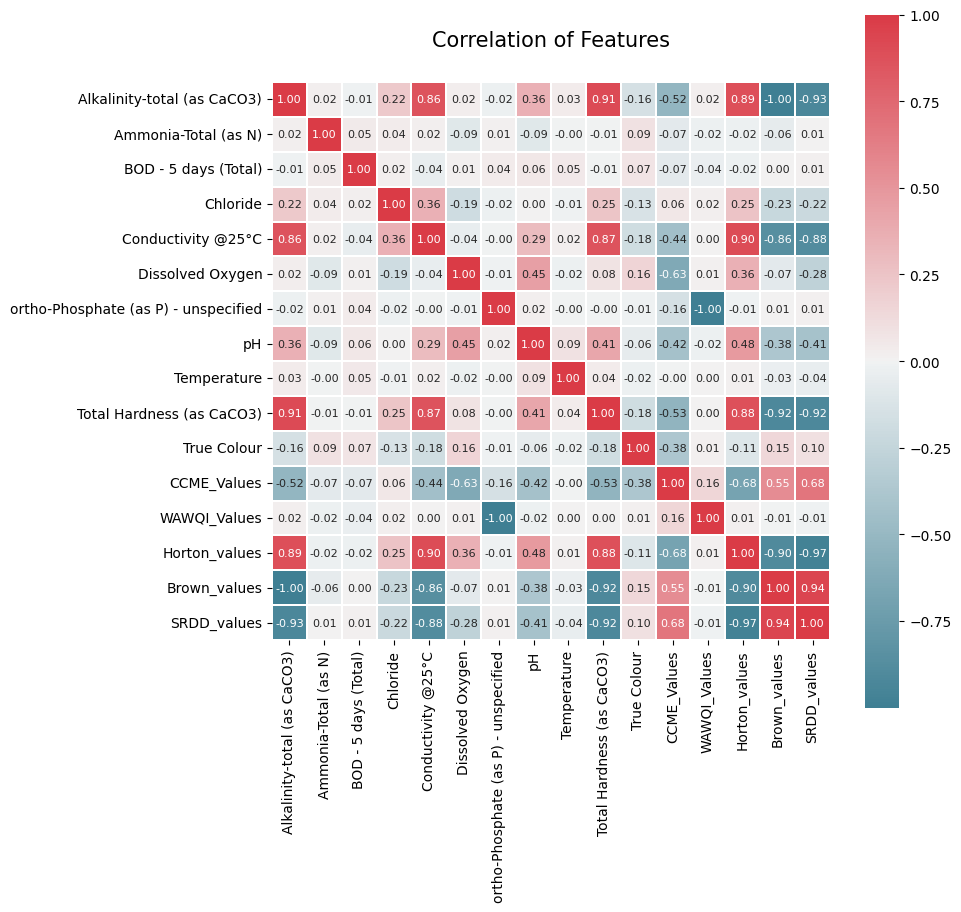

In [ ]:
import seaborn as sns
corr = output_df.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(9,9)) #Figure size
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15)

In [ ]:
SC1 = px.line(output_df, x="Years",y="CCME_Values", color=output_df.CCME_WQI)
SC1.update_layout(yaxis_range=[0, 100])  # Set the desired y-axis range
SC2 = px.line(output_df, x="Years",y="WAWQI_Values", color=output_df.WAWQI)
SC2.update_layout(yaxis_range=[-10, 100])  # Set the desired y-axis range
SC1.show()
SC2.show()

In [ ]:
output_df.head()

WaterbodyName  Years SampleDate  Alkalinity-total (as CaCO3)  \
0  ABBEYTOWN_010   2023        Feb                        314.0   
1          Allua   2007        Aug                         14.0   
2          Allua   2007        Aug                         17.0   
3          Allua   2007        Aug                         18.0   
4          Allua   2007        Sep                         19.0   

   Ammonia-Total (as N)  BOD - 5 days (Total)  Chloride  Conductivity @25°C  \
0                 0.033                   1.2      27.3               711.0   
1                 0.033                   1.2      10.0                71.0   
2                 0.033                   1.2      11.5                79.0   
3                 0.033                   1.2      11.3                78.0   
4                 0.033                   1.2      10.5                76.0   

   Dissolved Oxygen  ortho-Phosphate (as P) - unspecified  ...  CCME_Values  \
0             52.50                                 0.019  ...    64.105968   
1             61.85                                 0.019  ...    76.753708   
2             61.80                                 0.019  ...    77.222817   
3             62.40                                 0.019  ...    76.953511   
4             66.05                                 0.019  ...    76.867653   

   CCME_WQI  WAWQI_Values  WAWQI  Horton_values  Horton WQI  Brown_values  \
0  Moderate     68.121233   Good     117.590909  Unsuitable     72.726551   
1      Fair     68.946463   Good      33.825455    Moderate     97.649888   
2      Fair     68.961140   Good      35.034545    Moderate     97.388310   
3      Fair     68.997174   Good      35.220000    Moderate     97.303327   
4      Fair     69.449725   Good      36.274545    Moderate     97.182033   

   Brown WQI  SRDD_values   SRDD WQI  
0       Good    38.469342       Poor  
1  Excellent    96.242574  Excellent  
2  Excellent    95.983952  Excellent  
3  Excellent    95.922072  Excellent  
4  Excellent    95.710180  Excellent  

[5 rows x 24 columns]

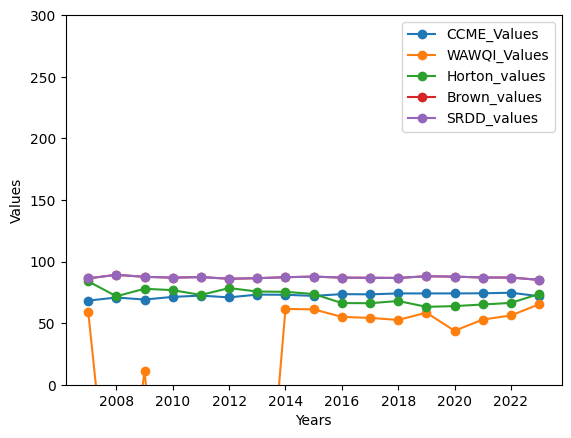

In [ ]:
import matplotlib.pyplot as plt

# Select the desired columns from the dataset
selected_columns = ['Years', 'CCME_Values', 'WAWQI_Values', 'Horton_values', 'Brown_values', 'SRDD_values']
plot_data = output_df[selected_columns]

# Group the data by "Years" and calculate the mean for each column
grouped_data = plot_data.groupby('Years').mean()

# Plotting the data
fig, ax = plt.subplots()
ax.plot(grouped_data.index, grouped_data['CCME_Values'], marker='o', linestyle='-', label='CCME_Values')
ax.plot(grouped_data.index, grouped_data['WAWQI_Values'], marker='o', linestyle='-', label='WAWQI_Values')
ax.plot(grouped_data.index, grouped_data['Horton_values'], marker='o', linestyle='-', label='Horton_values')
ax.plot(grouped_data.index, grouped_data['Brown_values'], marker='o', linestyle='-', label='Brown_values')
ax.plot(grouped_data.index, grouped_data['Brown_values'], marker='o', linestyle='-', label='SRDD_values')
# Adding labels and legend
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.legend()
ax.set_ylim([0, 300])
# Displaying the plot
plt.show()


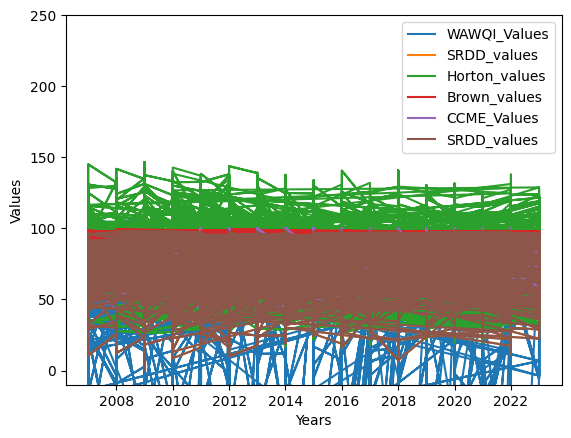

In [ ]:
import matplotlib.pyplot as plt

# Select the desired columns from the dataset
selected_columns = ['Years', 'WAWQI_Values', 'SRDD_values', 'Horton_values', 'Brown_values', 'CCME_Values', 'SRDD_values']
plot_data = output_df[selected_columns]

# Set the 'Years' column as the index
plot_data.set_index('Years', inplace=True)

# Plotting the data
fig, ax = plt.subplots()
plot_data.plot(ax=ax)

# Adding labels and legend
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.legend()

# Set y-axis limits from 0 to 100
ax.set_ylim(-10, 250)

# Displaying the plot
plt.show()


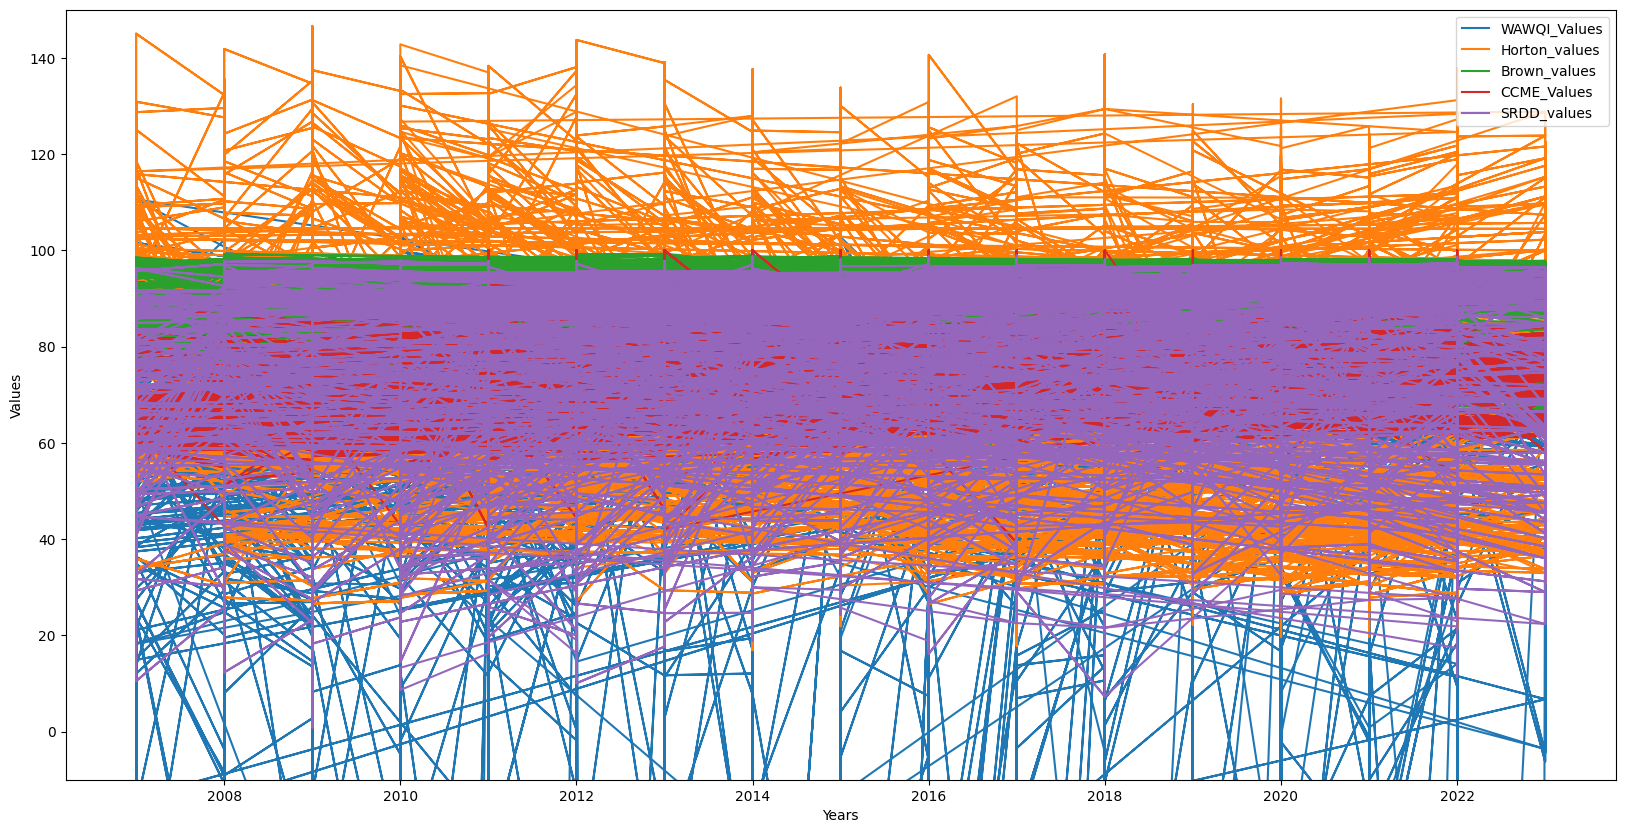

In [ ]:
import matplotlib.pyplot as plt

# Select the desired columns from the dataset
selected_columns = ['Years', 'WAWQI_Values', 'Horton_values', 'Brown_values', 'CCME_Values', 'SRDD_values']
plot_data = output_df[selected_columns]

# Set the 'Years' column as the index
plot_data.set_index('Years', inplace=True)

# Increase the width of the figure
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the width value as needed

# Plotting the data
plot_data.plot(ax=ax)

# Adding labels and legend
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.legend()

# Set y-axis limits from -10 to 250
ax.set_ylim(-10, 150)

# Displaying the plot
plt.show()


In [ ]:
# df1= output_df["CCME_Values"]
# df2 =  output_df["WAWQI_Values"]
# plt.figure(figsize=(20,10))
# plt.plot(df1)
# plt.xlabel('Days')
# plt.ylabel('WQI Value')



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



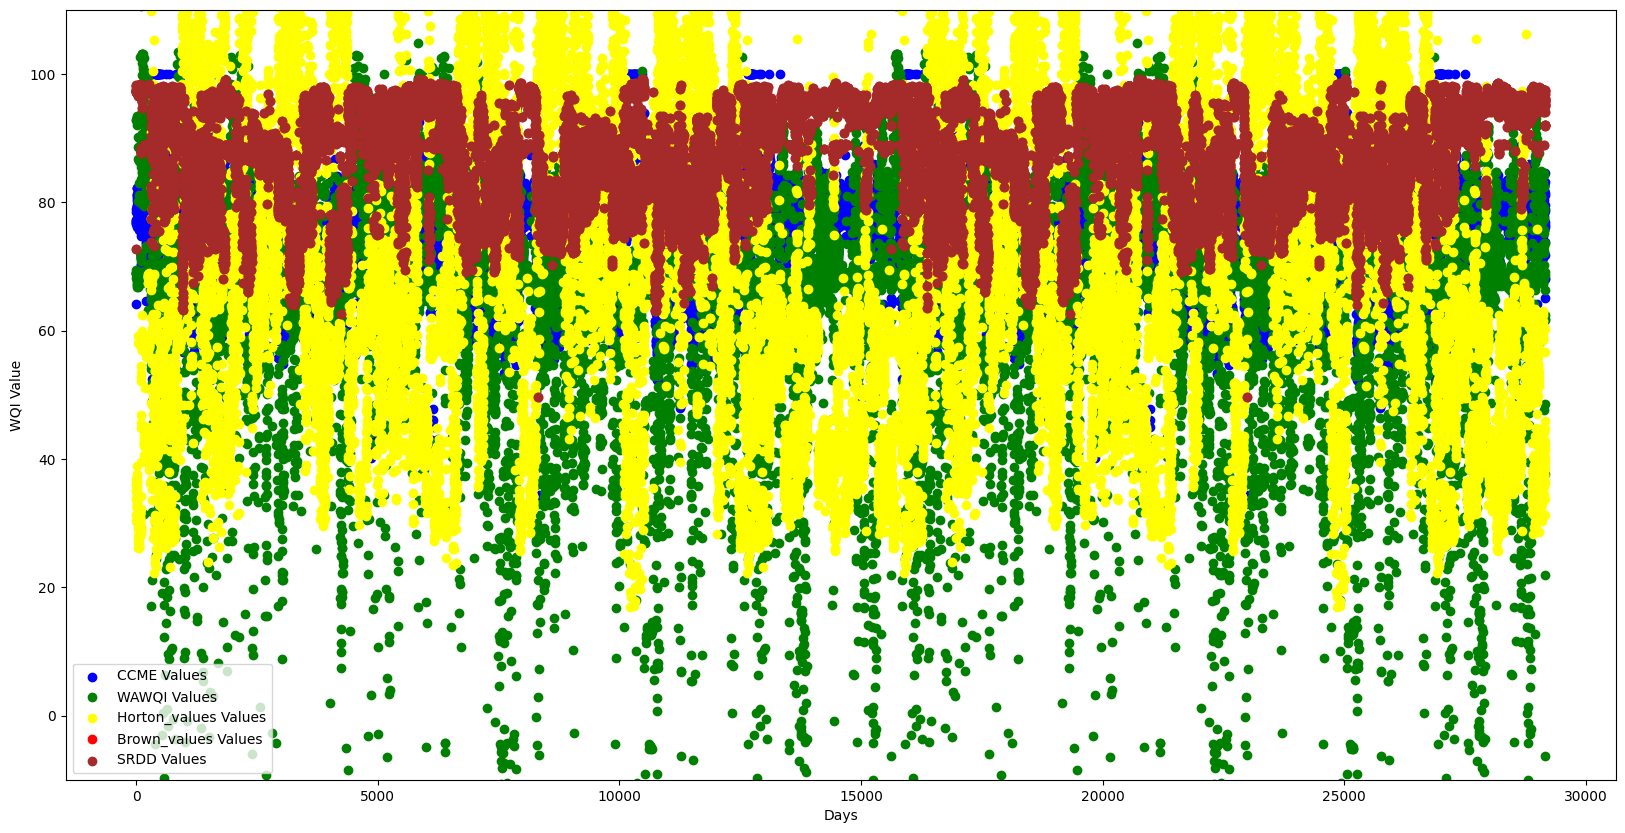

In [ ]:
df1 = output_df["CCME_Values"]
df2 = output_df["WAWQI_Values"]
df3 = output_df["Horton_values"]
df4 = output_df["Brown_values"]
df5 = output_df["SRDD_values"]

plt.figure(figsize=(20, 10))
plt.scatter(df1.index, df1, color='blue', label='CCME Values')
plt.scatter(df2.index, df2, color='green', label='WAWQI Values')
plt.scatter(df3.index, df3, color='yellow', label='Horton_values Values')
plt.scatter(df4.index, df4, color='red', label='Brown_values Values')
plt.scatter(df5.index, df4, color='brown', label='SRDD Values')
plt.xlabel('Days')
plt.ylabel('WQI Value')
plt.legend()

plt.ylim(-10, 110)  # Set the y-axis range from 0 to 200

plt.show()


In [ ]:
import matplotlib.pyplot as plt

df1 = output_df["CCME_Values"]
df2 = output_df["WAWQI_Values"]
df3 = output_df["Horton_values"]
df4 = output_df["Brown_values"]
df5 = output_df["SRDD_values"]

dot_size = 2  # Specify the size of the dots

plt.figure(figsize=(20, 10))
plt.scatter(df1.index, df1, s=dot_size, color='blue', label='CCME Values')
plt.scatter(df2.index, df2, s=dot_size, color='green', label='WAWQI Values')
plt.scatter(df3.index, df3, s=dot_size, color='yellow', label='Horton_values Values')
plt.scatter(df4.index, df4, s=dot_size, color='red', label='Brown_values Values')
plt.scatter(df5.index, df5, s=dot_size, color='brown', label='SRDD Values')
plt.xlabel('Days')
plt.ylabel('WQI Value')
plt.legend()

plt.ylim(0, 120)  # Set the y-axis range from -10 to 110

plt.show()


In [ ]:
import matplotlib.pyplot as plt

df1 = output_df["CCME_Values"]
df2 = output_df["WAWQI_Values"]
df3 = output_df["Horton_values"]
df4 = output_df["Brown_values"]
df5 = output_df["SRDD_values"]
s = 0.3
plt.figure(figsize=(20, 4))
plt.plot(df1.index, df1, color='blue', label='CCME Values', linewidth=s)  # Specify linewidth as 2
plt.plot(df2.index, df2, color='green', label='WAWQI Values', linewidth=s)  # Specify linewidth as 2
plt.plot(df3.index, df3, color='yellow', label='Horton_values Values', linewidth=s)  # Specify linewidth as 2
plt.plot(df4.index, df4, color='brown', label='Brown_values Values', linewidth=s)  # Specify linewidth as 2
plt.scatter(df5.index, df4, color='red', label='SRDD Values')
plt.xlabel('Days')
plt.ylabel('WQI Value')
plt.legend()

plt.ylim(0, 110)  # Set the y-axis range from 0 to 200

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sample data
data1 = output_df["CCME_Values"]
data2 = output_df["WAWQI_Values"]
data3 = output_df["Horton_values"]
data4 = output_df["Brown_values"]
data5 = output_df["SRDD_values"]

data = [data1, data2, data3, data4, data5]

# Define colors for the boxes
box_colors = ['blue', 'green', 'yellow', 'red', 'brown']

# Creating the box plot
plt.figure(figsize=(10, 6))
boxes = plt.boxplot(data, patch_artist=True)

# Assigning colors to each box
for box, color in zip(boxes['boxes'], box_colors):
    box.set(facecolor=color)

# Adding labels
plt.xlabel('Variables')
plt.ylabel('WQI Value')
plt.xticks([1, 2, 3, 4,5], ['CCME', 'WAWQI', 'Horton', 'Brown', 'SRDD'])

# Setting y-axis range
plt.ylim(-20, 110)

# Displaying the plot
plt.show()


In [ ]:
output_df.describe()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data from output_df
x = output_df['CCME_Values']
y = output_df['Horton_values']
z = output_df['Years']

# Creating figure
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

# Add x, y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z, alpha=0.8, c=(x + y + z), cmap=my_cmap, marker='^')

plt.title("3D Scatter Plot")
ax.set_xlabel('CCME', fontweight='bold')
ax.set_ylabel('Horton_values', fontweight='bold')
ax.set_zlabel('Years', fontweight='bold')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

# Set axis limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data from output_df
x = output_df['CCME_Values']
y = output_df['Brown_values']
z = output_df['Years']

# Creating figure
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

# Add x, y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z, alpha=0.8, c=(x + y + z), cmap=my_cmap, marker='^')

plt.title("3D Scatter Plot")
ax.set_xlabel('CCME Index', fontweight='bold')
ax.set_ylabel('Brown Index', fontweight='bold')
ax.set_zlabel('Years', fontweight='bold')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

# Set axis limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data from output_df
x = output_df['Horton_values']
y = output_df['WAWQI_Values']
z = output_df['Years']

# Creating figure
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

# Add x, y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Set color for Horton_values points
colors = np.where(y < x, 'blue', 'red')

# Creating plot
sctt = ax.scatter3D(x, y, z, alpha=0.8, c=colors, cmap=my_cmap, marker='^')

plt.title("3D Scatter Plot")
ax.set_xlabel('Horton', fontweight='bold')
ax.set_ylabel('WAWQI', fontweight='bold')
ax.set_zlabel('Years', fontweight='bold')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

# Set axis limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data from output_df
x = output_df['SRDD_values']
y = output_df['Brown_values']
z = output_df['Years']

# Creating figure
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

# Add x, y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

# Creating color map
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z, alpha=0.8, c=(x + y + z), cmap=my_cmap, marker='^')

plt.title("3D Scatter Plot")
ax.set_xlabel('SRDD Index', fontweight='bold')
ax.set_ylabel('Brown Index', fontweight='bold')
ax.set_zlabel('Years', fontweight='bold')
fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

# Set axis limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Show plot
plt.show()


**Measuring Pearson Co-realtion between all WQI's**


---



In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Calculate the Pearson correlation coefficient and p-value for "CCME_Values" and "Brown_values"
corr_coef, p_value = pearsonr(output_df['CCME_Values'], output_df['Brown_values'])
# Display the correlation coefficient and p-value
print("CCME vs Brown")
print('Pearson correlation coefficient:', corr_coef)
print('P-value: CCME vs Brown', p_value)

print("\nCCME vs Horton")
corr_coef, p_value = pearsonr(output_df['CCME_Values'], output_df['Horton_values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: CCME vs Horton', p_value)


print("\nCCME vs WA-WQI")
corr_coef, p_value = pearsonr(output_df['CCME_Values'], output_df['WAWQI_Values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: CCME vs WA-WQI', p_value)

print("\nCCME vs SRDD")
corr_coef, p_value = pearsonr(output_df['CCME_Values'], output_df['SRDD_values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: CCME vs SRDD', p_value)

print("\nBrown vs Horton")
# corr_coef, p_value = pearsonr(output_df['Brown_Values'], output_df['Horton_values'])
corr_coef, p_value = pearsonr(output_df['Horton_values'], output_df['Brown_values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: CCME vs Horton', p_value)

print("\nBrown vs WA-WQI")
corr_coef, p_value = pearsonr(output_df['Brown_values'], output_df['WAWQI_Values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: Brown vs WA-WQI', p_value)

print("\nBrown vs SRDD")
# corr_coef, p_value = pearsonr(output_df['SRDD_values'], output_df['Brown_Values'])
corr_coef, p_value = pearsonr(output_df['Brown_values'], output_df['SRDD_values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: Brown vs SRDD', p_value)

print("\nHorton vs WA-WQI")
corr_coef, p_value = pearsonr(output_df['Horton_values'], output_df['WAWQI_Values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: Horton vs WA-WQI', p_value)

print("\nHorton vs SRDD")
# corr_coef, p_value = pearsonr(output_df['Horton_values'], output_df['SRDD_Values'])
corr_coef, p_value = pearsonr(output_df['Horton_values'], output_df['SRDD_values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: Horton vs SRDD', p_value)

print("\nWA-WQI vs SRDD")
# corr_coef, p_value = pearsonr(output_df['WAWQI_Values'], output_df['SRDD_Values'])
corr_coef, p_value = pearsonr(output_df['WAWQI_Values'], output_df['SRDD_values'])
print('Pearson correlation coefficient:', corr_coef)
print('P-value: WA-WQI vs SRDD', p_value)

In [ ]:
output_df.head()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the column names
# columns = [ 'CCME_WQI', 'WAWQI',  'Horton WQI',  'Brown WQI', 'SRDD WQI']

# # Initialize counters
# good_counts = []
# poor_counts = []

# # Count the frequency of "Good" and "Poor" in each column
# for column in columns:
#     good_freq = output_df[column].value_counts().get('Good', 0)
#     poor_freq = output_df[column].value_counts().get('Poor', 0)
#     good_counts.append(good_freq)
#     poor_counts.append(poor_freq)

# # Set the position of the bars on the x-axis
# x = np.arange(len(columns))
# width = 0.35

# # Create a grouped bar chart
# fig, ax = plt.subplots(figsize=(12, 6))
# rects1 = ax.bar(x - width/2, good_counts, width, label='Good', color='green')
# rects2 = ax.bar(x + width/2, poor_counts, width, label='Poor', color='red')

# # Set axis labels and title
# ax.set_xlabel('Columns')
# ax.set_ylabel('Frequency')
# ax.set_title('Grouped Bar Chart: Frequency of Good and Poor')
# ax.set_xticks(x)
# ax.set_xticklabels(columns, rotation=45, ha='right')

# # Add legend
# ax.legend()

# # Add value labels on top of each bar
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3), textcoords='offset points',
#                     ha='center', va='bottom')
# autolabel(rects1)
# autolabel(rects2)

# # Show the chart
# plt.tight_layout()
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the column names
columns = ['CCME_WQI', 'WAWQI', 'Horton WQI', 'Brown WQI', 'SRDD WQI']

# Initialize counters
good_counts = []
marginal_counts = []
poor_counts = []

# Count the frequency of "Good", "Marginal", and "Poor" in each column
for column in columns:
    good_freq = output_df[column].value_counts().get('Good', 0)
    marginal_freq = output_df[column].value_counts().get('Moderate', 0)
    poor_freq = output_df[column].value_counts().get('Poor', 0)
    good_counts.append(good_freq)
    marginal_counts.append(marginal_freq)
    poor_counts.append(poor_freq)

# Set the position of the bars on the x-axis
x = np.arange(len(columns))
width = 0.25

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, good_counts, width, label='Good', color='green')
rects2 = ax.bar(x, marginal_counts, width, label='Moderate', color='orange')  # Added "Marginal" bars
rects3 = ax.bar(x + width, poor_counts, width, label='Poor', color='red')

# Set axis labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Frequency')
ax.set_title('Grouped Bar Chart: Frequency of Good, Moderate, and Poor')
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=45, ha='right')

# Add legend
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = output_df.iloc[:, -11:].corr()  # Select the last 11 columns for correlation
colormap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(9, 9))  # Figure size
heatmap = sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',
                      annot_kws={'size': 12, 'weight': 'bold'},  # Increase font size and add bold weight
                      cmap=colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of WQI Models', y=1.05, size=15)

# Increase font size of x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = output_df.iloc[:, -11:].corr()  # Select the last 11 columns for correlation
colormap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(9, 9))  # Figure size
heatmap = sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',
                      annot_kws={'size': 8},
                      cmap=colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of WQI Models', y=1.05, size=15)

# Increase font size of x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired columns
columns_to_show = ["Alkalinity-total (as CaCO3)", "Ammonia-Total (as N)", "BOD - 5 days (Total)",
                   "Chloride", "Conductivity @25°C", "Dissolved Oxygen",
                   "ortho-Phosphate (as P) - unspecified", "pH", "Temperature",
                   "Total Hardness (as CaCO3)", "True Colour"]

# Determine the number of rows and columns needed for the grid
n_cols = 4
n_rows = (len(columns_to_show)) // n_cols + 1

# Create a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 2 * n_rows))

# Flatten the grid of subplots to a 1D array
axes = axes.flatten()

# Loop through each selected column and create a boxplot in the corresponding subplot
for i, column in enumerate(columns_to_show):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Hide any unused subplots
for ax in axes[len(columns_to_show):]:
    ax.remove()

# Adjust spacing between subplots and display the plot
plt.tight_layout()
plt.show()


In [ ]:
output_df.head()

In [ ]:
output_df['CCME_WQI'].value_counts()
# output_df['WAWQI'].value_counts()
# output_df['Horton WQI'].value_counts()
# output_df['Brown WQI'].value_counts()
# output_df['SRDD WQI'].value_counts()

